Image loaded successfully!


(np.float64(-0.5), np.float64(473.5), np.float64(315.5), np.float64(-0.5))

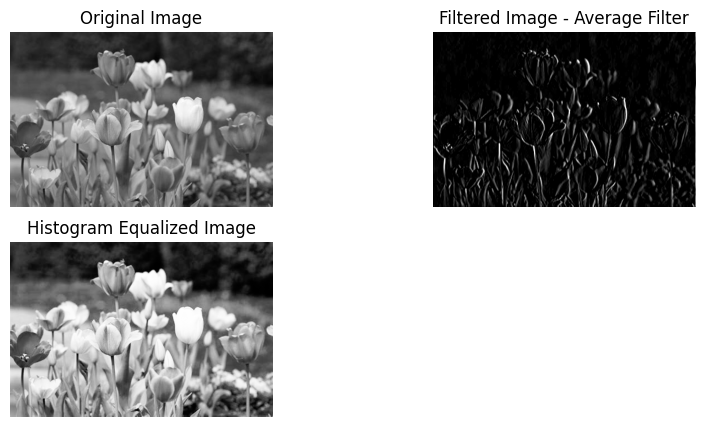

In [17]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


def filter2d(image,kernel):
    img_h,img_w = image.shape
    k_h,kw= kernel.shape
    pad_h,pad_w = k_h//2,kw//2
    padded_image = np.pad(image,((pad_h,pad_h),(pad_w,pad_w)),mode='constant')
    filtered_image = np.zeros_like(image)

    for h in range(img_h):
        for w in range(img_w):
            region = padded_image[h:h+k_h,w:w+kw]
            filtered_value = np.sum(region*kernel)
            filtered_image[h,w] = np.clip(filtered_value,0,255)
    return filtered_image

currenPaths = os.getcwd().split(os.sep)
currenPaths.pop()
img_path = os.path.join(os.sep.join(currenPaths), 'images/tulip.jpeg')

img = cv.imread(img_path,0)

if img is None:
    print(f"Error: Could not find image at {img_path}")
    exit(1)
else:
    print("Image loaded successfully!")

avg_kernel = np.ones((3,3),dtype=np.float32)/9
sovel_kernel = np.array([[1,0,-1],[1,0,-1],[1,0,-1]],dtype=np.float32)
filtered_img_avg= filter2d(img,sovel_kernel)

equalized_hist = cv.equalizeHist(img)
# img_h,img_w = img.shape
# print(f"Image dimensions: Height={img_h}, Width={img_w}")
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Filtered Image - Average Filter')
plt.imshow(filtered_img_avg, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Histogram Equalized Image')
plt.imshow(equalized_hist, cmap='gray')
plt.axis('off')






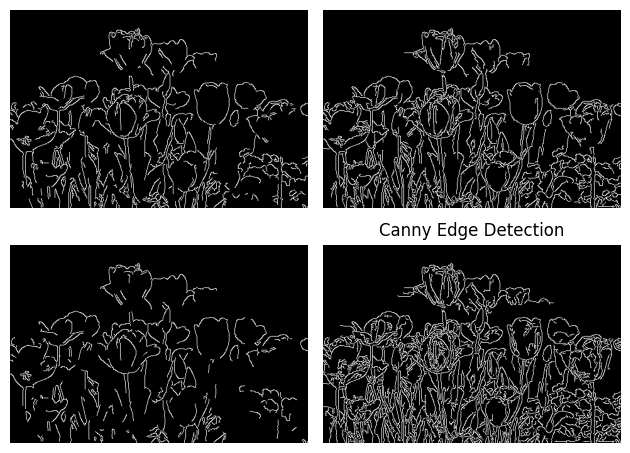

In [22]:
edges1 = cv.Canny(img, 100, 200)
edges2 = cv.Canny(img, 50, 150)
edges3= cv.Canny(img, 150, 250)
edges4= cv.Canny(img, 10, 100)

plt.subplot(2,2,4)
plt.title('Canny Edge Detection')
plt.subplot(2,2,1)
plt.imshow(edges1, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(edges2, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(edges3, cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(edges4, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
